In [0]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F




In [0]:
#Dummy Dataset
df = pd.DataFrame(np.random.randint(0,100,size=(1000, 4)), columns=list('ABCD'))

In [0]:
df["E"] = df["A"] * 1 + df["B"] * 2 + df["C"]  * 3 + df["D"]  * 4

In [0]:
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

In [0]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [0]:
batch_size = 50
num_epochs = 200
learning_rate = 0.01

batch_no = len(X_train) // batch_size

n_feature=X_train.shape[1]
n_output=1

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("Device :",device)

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_output):
        super(Net, self).__init__()
        self.predict = torch.nn.Linear(n_feature, n_output)

    def forward(self, x):
        x = self.predict(x)
        return x
    
net = Net(n_feature, n_output)

Device : cpu


In [8]:
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss(size_average=False)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [0]:
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([300])) that is different to the input size (torch.Size([300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


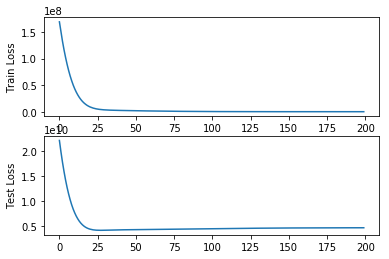

In [10]:
from sklearn.utils import shuffle
from torch.autograd import Variable

running_loss = 0.0
loss_ar = []
test_loss_ar = []
for epoch in range(num_epochs):
    net.train()
    X_train, y_train = shuffle(X_train, y_train)
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.FloatTensor(y_train[start:end]))
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, torch.unsqueeze(labels,dim=1))
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    loss_ar.append(running_loss)
    running_loss = 0.0
    
    net.eval()
    inputs = Variable(torch.FloatTensor(X_test))
    labels = Variable(torch.FloatTensor(y_test))
    y_pred = net(inputs)
    test_loss = criterion(y_pred, labels)
    test_loss_ar.append(test_loss.item())

plt.subplot(2, 1, 1)
plt.plot(loss_ar)
plt.ylabel('Train Loss')

plt.subplot(2, 1, 2)
plt.plot(test_loss_ar)
plt.ylabel('Test Loss')

plt.show()
